# Holy Abalone-y! 

### Using linear regression to estimate the ages of farmed Abalone based on physical characteristics, and investigating potential survival bias within the sampled population

#### *By Eric Wilson*

# Can you estimate the age of an abalone?

## Background
You are working as an intern for an abalone farming operation in Japan. For operational and environmental reasons, it is an important consideration to estimate the age of the abalones when they go to market. 

Determining an abalone's age involves counting the number of rings in a cross-section of the shell through a microscope. Since this method is somewhat cumbersome and complex, you are interested in helping the farmers estimate the age of the abalone using its physical characteristics.

## The data
You have access to the following historical data ([source](https://archive.ics.uci.edu/ml/datasets/abalone)):

#### Abalone characteristics:
- "sex" - M, F, and I (infant).
- "length" - longest shell measurement.
- "diameter" - perpendicular to the length.
- "height" - measured with meat in the shell.
- "whole_wt" - whole abalone weight.
- "shucked_wt" - the weight of abalone meat.
- "viscera_wt" - gut-weight.
- "shell_wt" - the weight of the dried shell.
- "rings" - number of rings in a shell cross-section.
- "age" - the age of the abalone: the number of rings + 1.5.

***Acknowledgments**: Warwick J Nash, Tracy L Sellers, Simon R Talbot, Andrew J Cawthorn, and Wes B Ford (1994) "The Population Biology of Abalone (_Haliotis_ species) in Tasmania. I. Blacklip Abalone (_H. rubra_) from the North Coast and Islands of Bass Strait", Sea Fisheries Division, Technical Report No. 48 (ISSN 1034-3288).*

In [1]:
suppressPackageStartupMessages(library(tidyverse))
abalone <- readr::read_csv('data/abalone.csv', show_col_types = FALSE)
head(abalone)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,16.5
M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5
F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5
M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5
I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5
I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5


### Installing Libraries 

In [2]:
### additional packages and libraries
install.packages("ggplot2")
library(ggplot2)
print("Complete")

Installing ggplot2 [3.3.6] ...
	OK [linked cache]
[1] "Complete"



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select





Attaching package: ‘MASS’





Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine





Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’





Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.




Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1




Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select





Attaching package: ‘MASS’





Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine





Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’





Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.




Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1




Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select





Attaching package: ‘MASS’





Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine





Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’





Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.




Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1




Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select





Attaching package: ‘MASS’





Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine





Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’





Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.




Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


randomForest 4.7-1.1




Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select





Attaching package: ‘MASS’




### 1. How does weight change with age for each of the three sex categories?

We'll begin by plotting weight and age by sex, to see if any trends pop out. Then, we'll take a look at what the general trend of weight by age is, using *geom_smooth()*, to see if anything insightful comes out.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



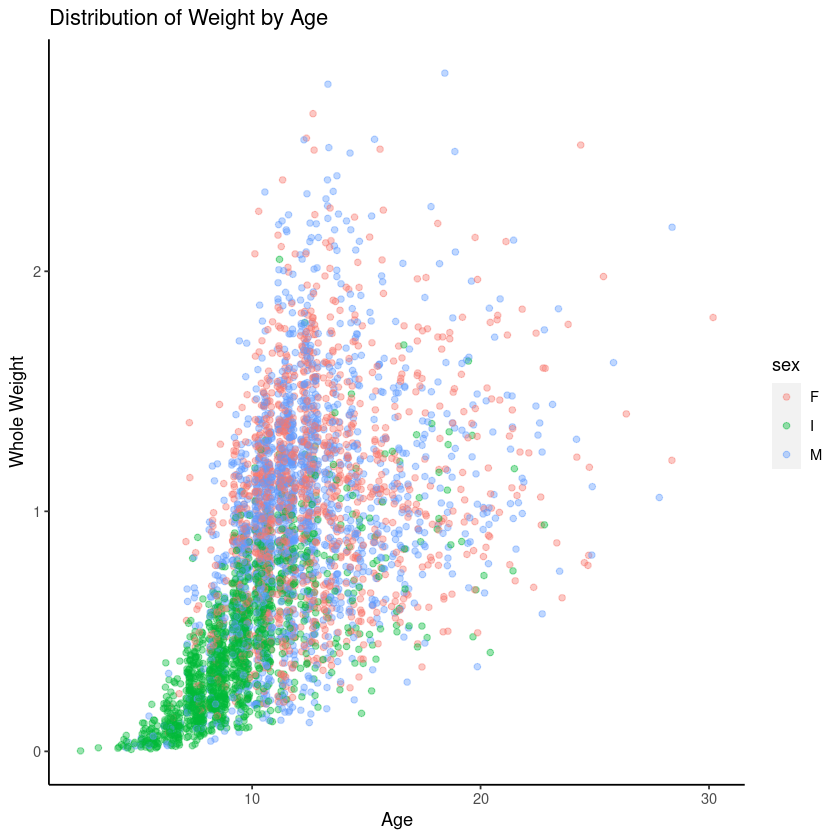

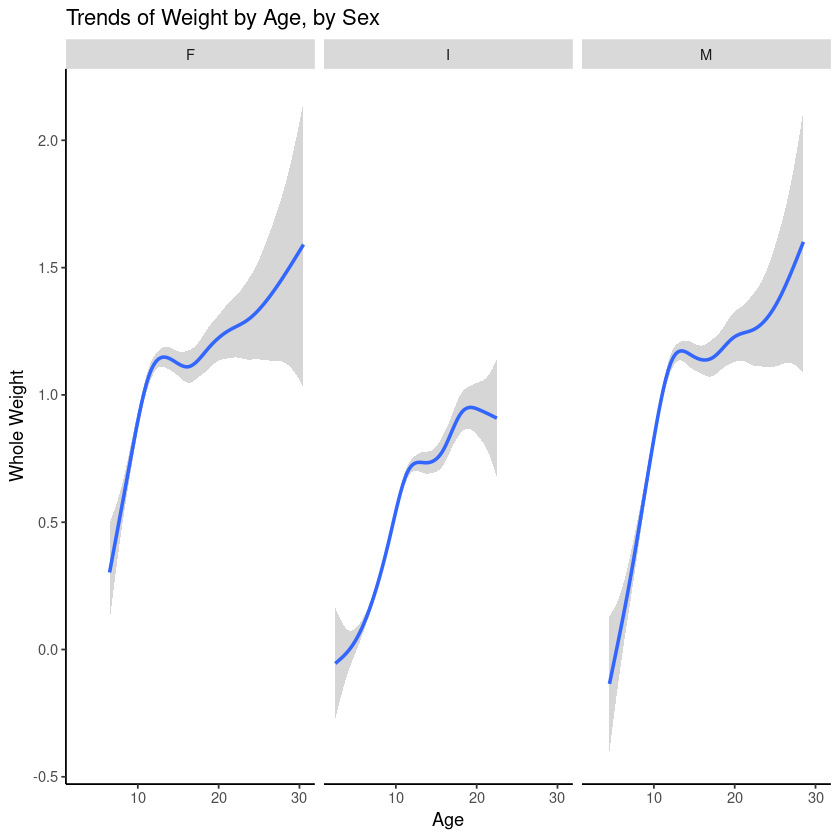

In [4]:
### scatter plot with lowered alpha and jittered points, to show density by sex
ggplot(abalone, aes(age, whole_wt, color = sex)) +
    geom_jitter(alpha = .4) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(), 
          panel.background = element_blank(),
          axis.line = element_line(colour = "black")) +
    labs(y = "Whole Weight", x = "Age", title = "Distribution of Weight by Age")
### smoothed trendlines, showing the general trends and variance of weight by age, partitioned by sex
ggplot(abalone, aes(age, whole_wt)) +
    geom_smooth() +
    facet_wrap(~sex) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line = element_line(colour = "black")) +
    labs(y = "Whole Weight", x = "Age", title = "Trends of Weight by Age, by Sex")

Age and weight do not seem to differ greatly between the sexes; infants tend to be smaller and younger (as one would expect), but there are examples of infant outliers in the aggregate data.

Until the age of about 12.5, males, females, and infants all show a positive trend in the relationship between weight and age. Interestingly, from about 12.5 to 15 for infants, and 12.5 to 16.5 for males and females, there is a negative relationship (with increasing variance). From these ages onward, there is a positive relation between weight and age, but the trend shows heteroskedascity, becoming more of a "cone" as variance increases significantly. Likely, at least in terms of the decline in weight in infants, it is because they become adults at or near a certain weight / maturity.

My theory is that, once the abalone reach a certain weight, they are harvested, creating a survival bias: the abalones that are underweight at the time of harvest continue to live, while those who are at or above the target weight get harvested. Without having greater information on the farming techniques (are the abalone grown in controlled pools, where the farmers know the age of hatched / "planted" abalone), it is difficult to determine if the farmers harvest based on age or weight alone, but intuition says that abalones should continue to grow, rather than have a weight reduction period.

Now, what does the distribution of age and weight look like between Males, Females, and Infants?

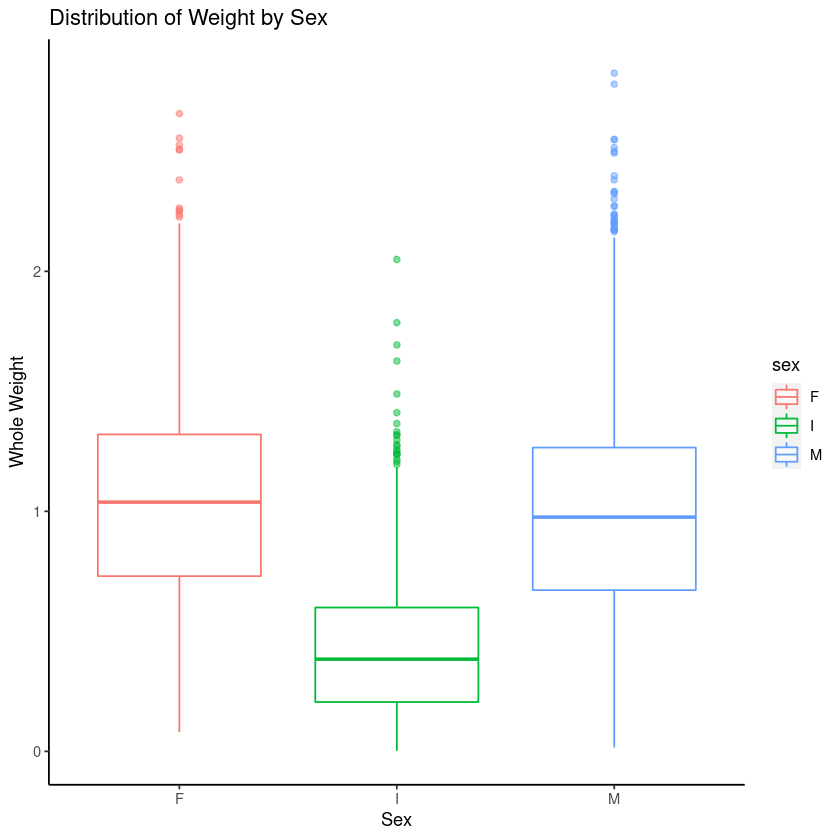

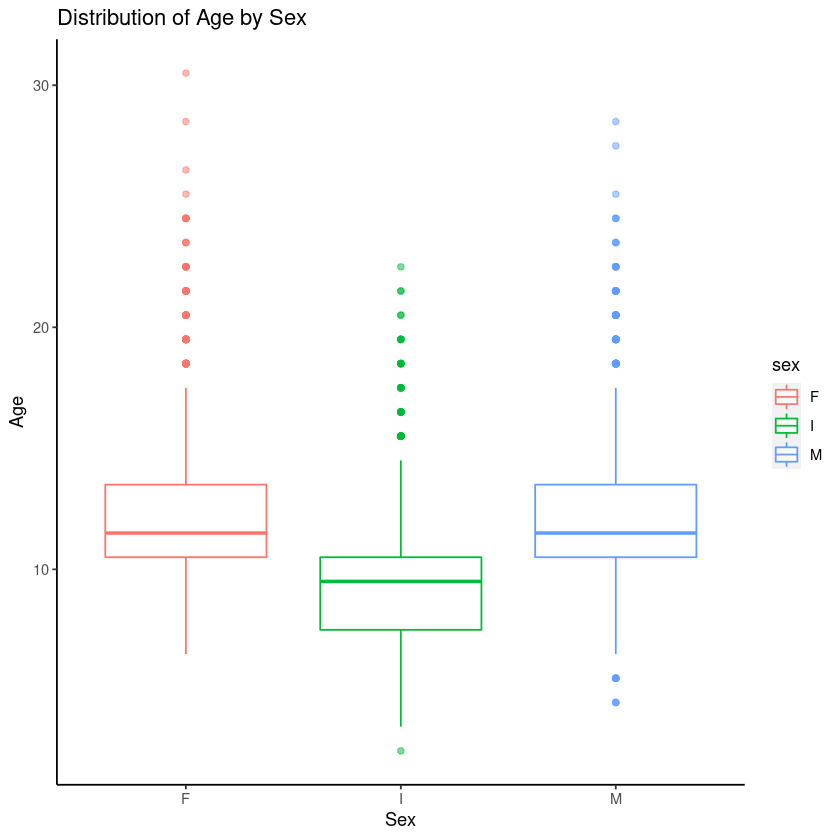

In [5]:
### boxplot of whole weight distribution by sex
ggplot(abalone, aes(sex, whole_wt, color = sex)) +
    geom_boxplot(alpha = .5) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line = element_line(colour = "black")) +
    labs(y = "Whole Weight", x = "Sex", title = "Distribution of Weight by Sex")
### boxplot of age distribution by sex
ggplot(abalone, aes(sex, age, color = sex)) +
    geom_boxplot(alpha = .5) +
    theme(panel.grid.major = element_blank(),
          panel.grid.minor = element_blank(),
          panel.background = element_blank(),
          axis.line = element_line(colour = "black")) +
    labs(y = "Age", x = "Sex", title = "Distribution of Age by Sex")

In general, females tend to weight a little more than males, although the heaviest abalones harvested have been males. The age distribution is nearly identical between males and females, although the oldest harvested specimen has been a female. There is enough overlay between the age and weight ranges and distributions of males and females that, based on these two variables alone, one would have to guess as to which sex the abalone is.

Infants weigh less and are younger than males and females on average, but there are plenty of examples in which, on age and weight characteristics, one would be unable to tell if an abalone was an infant or adult. 

### 2. Can you estimate an abalone's age using its physical characteristics?

Of course we can estimate an abalone's age using its physical characteristics! The true question is, how well?

First, we'll need to establish what the physical characteristics are. Based on the columns in the data frame, the only four characteristics which seem physical are length, diameter, height, and whole_wt. The length, diameter, and height are all measurable with a ruler or tape measure, and the weight is measurable with a scale. 

The following list is the excluded traits, as well as the reasons why:

    -Rings require a microscope, meaning that they can't be (easily) used, and age is just rings with 1.5 added, disqualifying it as well.  
    
    -Shucked_wt, viscera_wt, and shell_wt all require harvesting and killing the abalone. Assuming that age is being used to determine whether or not its time to harvest, it wouldn't make sense to use these variables, because one must harvest the abalone to measure them.
    
    -I don't know enough about the sexes of abalones, and a quick read on Wikipedia didn't help, to know how one determines an abalone's sex; therefore, I assume it requires opening the shell / harvesting the abalone, or observing mating behavior, and will be excluding it under the assumption that we're picking an abalone at random, without any previous observations, and looking solely at noninvasive, physically observable traits.

,length,diameter,height,whole_wt,age
length,1.0000000,0.9868116,0.8275536,0.9252612,0.5567196
diameter,0.9868116,1.0000000,0.8336837,0.9254521,0.5746599
height,0.8275536,0.8336837,1.0000000,0.8192208,0.5574673
whole_wt,0.9252612,0.9254521,0.8192208,1.0000000,0.5403897
age,0.5567196,0.5746599,0.5574673,0.5403897,1.0000000


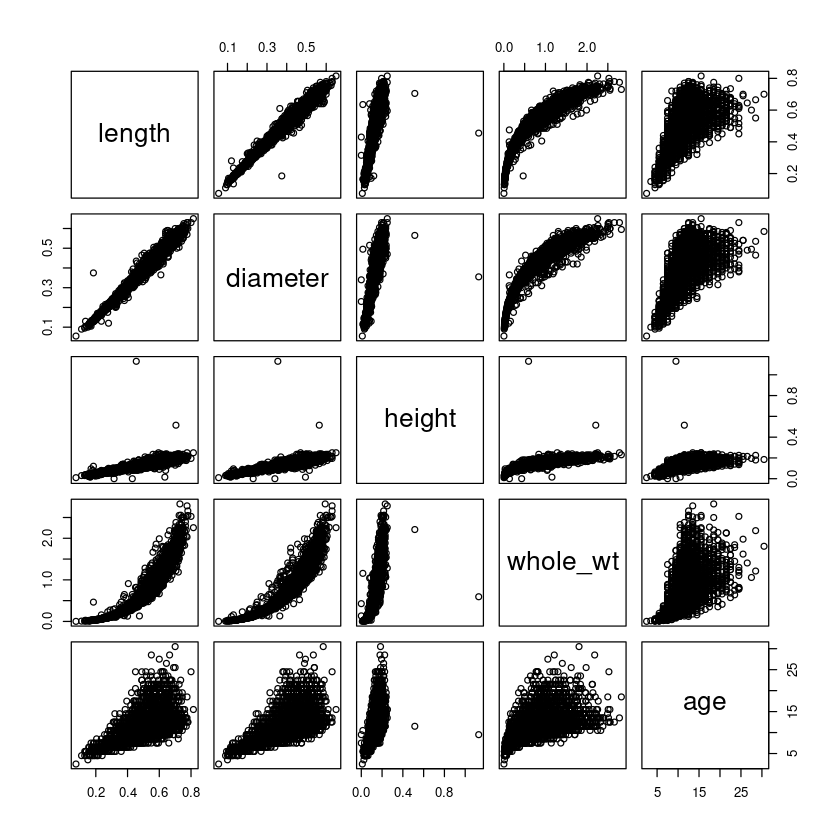

In [6]:
### Minimize the data to the relevant variables
physical <- abalone[,c(2:5,10)]
### check correlation values
cor(physical)
### scatterplot values in relation to one another
pairs(physical)

In preparing to build models, **length** and **diameter** seem to have relatively linear relationships to age, although they display heteroskedascity ("cone" distribution). **Height** seems surprisingly linear, although it slightly skewed by two outliers. **Whole weight** has the most "spread" of all, and seems like it could be non-linear; however, I am cautious in interpreting this relation, as the data distribution implies that there may be some type of survival bias (ex: once an abalone is a certain weight, it is harvested). 

In [7]:
### basic linear regression model information
physicallm <- lm(age ~., physical)
summary(physicallm)


Call:
lm(formula = age ~ ., data = physical)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.4435  -1.6112  -0.6160   0.9117  15.6598 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.40861    0.30922  14.257  < 2e-16 ***
length      -12.04857    2.10217  -5.731 1.07e-08 ***
diameter     25.64381    2.57384   9.963  < 2e-16 ***
height       20.24276    1.78180  11.361  < 2e-16 ***
whole_wt      0.06589    0.22557   0.292     0.77    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.59 on 4172 degrees of freedom
Multiple R-squared:  0.3556,	Adjusted R-squared:  0.3549 
F-statistic: 575.4 on 4 and 4172 DF,  p-value: < 2.2e-16


**Length**, **diameter**, and **height** have significantly low p-values, meaning that they most likely have an effect on age. Surprisingly, **whole_wt** does not, meaning that **whole_wt** may not be a good predictor of age (possibly due to the aforementioned survival bias). 

Next, let's try a train/test split and see the mean squared error.

In [8]:
### dataset without weight
atts <- physical[,c(1:3,5)]
### set seed
set.seed(1)
### all physical: split the data: 80/20 in this case
physicalOBS <- sample(1:nrow(physical),.8*nrow(physical),replace=FALSE)
physicaltrain <- physical[physicalOBS,]
physicaltest <- physical[-physicalOBS,]
### attributes without weight: split the data: 80/20 in this case
attsOBS <- sample(1:nrow(atts),.8*nrow(atts),replace=FALSE)
attstrain <- atts[attsOBS,]
attstest <- atts[-attsOBS,]

In [9]:
lm.fit <- lm(age ~ length + diameter + height, data=attstrain)
lm.pred <- predict(lm.fit, attstest)
ME <- mean(attstest$age - lm.pred)
MSE <- mean((attstest$age - lm.pred)^2)
print(paste("The mean error of actual age minus predicted age is: ", ME))
print(paste("The mean squared error of actual age minus predicted age is: ", format(MSE, scientific = FALSE)))

[1] "The mean error of actual age minus predicted age is:  0.0084404472200276"
[1] "The mean squared error of actual age minus predicted age is:  7.021808"


By fitting a simple regression model with length, diameter, and height, and subtracting the predicted values from the actual values, the mean error is quite low, even almost negligible. However, if we take the mean squared error (MSE), the error rate jumps significantly, because all values are squared, negating the averaging out of under and over estimations.

Although the simple regression model summary above the tuned model showed a high p-value / no significance for weight, let's try a regression model with weight to see how the MSE changes when weight is taken into account.

In [10]:
lm.fit2 <- lm(age ~ length + diameter + height + whole_wt, data=physicaltrain)
lm.pred2 <- predict(lm.fit2, physicaltest)
ME2 <- mean(physicaltest$age - lm.pred2)
MSE2 <- mean((physicaltest$age - lm.pred2)^2)
print(paste("The mean error of actual age minus predicted age (including weight) is: ", format(ME2, scientific = FALSE)))
print(paste("The mean squared error of actual age minus predicted age (including weight) is: ", format(MSE2, scientific = FALSE)))
print(paste("The mean error of actual age minus predicted age is: ", ME))
print(paste("The mean squared error of actual age minus predicted age is: ", format(MSE, scientific = FALSE)))

[1] "The mean error of actual age minus predicted age (including weight) is:  -0.123821"
[1] "The mean squared error of actual age minus predicted age (including weight) is:  8.680827"
[1] "The mean error of actual age minus predicted age is:  0.0084404472200276"
[1] "The mean squared error of actual age minus predicted age is:  7.021808"


The p-value of **whole weight** is considered statistically insignificant, and in adding it to the linear regression model, we received a worse mean error and mean squared error (as should be expected). As an amazing statistics Professor I once had said (and it stuck), "if the p is low, the null must go"; a simple look at p-values, versus gut instinct, can do wonders. Even though, by all intuition, an abalone should grow heavier as it ages.

Now, what happens if we build the same model, but use a 70/30 or 90/10 split?

In [11]:
### attributes, 70/30 split
attsOBS70 <- sample(1:nrow(atts),.7*nrow(atts),replace=FALSE)
attstrain70 <- atts[attsOBS70,]
attstest70 <- atts[-attsOBS70,]
### build and fit models, 70 for 70/30 split
lm.fit70 <- lm(age ~ length + diameter + height, data=attstrain70)
lm.pred70 <- predict(lm.fit70, attstest70)
ME70 <- mean(attstest70$age - lm.pred70)
MSE70 <- mean((attstest70$age - lm.pred70)^2)
### attributes, 90/10 split
attsOBS90 <- sample(1:nrow(atts),.9*nrow(atts),replace=FALSE)
attstrain90 <- atts[attsOBS90,]
attstest90 <- atts[-attsOBS90,]
### build and fit models, 90 for 90/10 split
lm.fit90 <- lm(age ~ length + diameter + height, data=attstrain90)
lm.pred90 <- predict(lm.fit90, attstest90)
ME90 <- mean(attstest90$age - lm.pred90)
MSE90 <- mean((attstest90$age - lm.pred90)^2)

In [12]:
print("Mean errors: ")
print(paste("Mean error at 70/30 split: ", ME70))
print(paste("Mean error at 80/20 split: ", ME))
print(paste("Mean error at 90/10 split: ", ME90))
print("Mean Squared Errors: ")
print(paste("MSE at 70/30 split: ", MSE70))
print(paste("MSE at 80/20 split: ", MSE))
print(paste("MSE at 90/10 split: ", MSE90))

[1] "Mean errors: "
[1] "Mean error at 70/30 split:  0.0132299495368129"
[1] "Mean error at 80/20 split:  0.0084404472200276"
[1] "Mean error at 90/10 split:  -0.0477467890718827"
[1] "Mean Squared Errors: "
[1] "MSE at 70/30 split:  6.59477622301568"
[1] "MSE at 80/20 split:  7.02180766118503"
[1] "MSE at 90/10 split:  10.6546865836899"


In this situation, it seems that an 80/20 train/test split does the best job at minimizing mean error, but a 70/30 train/test split does the best at minimizing MSE, by being more adaptable to outliers. 

Just for fun, let's use the 70/30 model to see how it would predict the ages of six abalones: three of them with the attributes for the 1st, 2nd, and 3rd quartiles of the measurement distributions, and three with randomly generated numbers.

In [13]:
### see the stats of the variables in the atts table
summary(atts)

     length         diameter          height            age       
 Min.   :0.075   Min.   :0.0550   Min.   :0.0000   Min.   : 2.50  
 1st Qu.:0.450   1st Qu.:0.3500   1st Qu.:0.1150   1st Qu.: 9.50  
 Median :0.545   Median :0.4250   Median :0.1400   Median :10.50  
 Mean   :0.524   Mean   :0.4079   Mean   :0.1395   Mean   :11.43  
 3rd Qu.:0.615   3rd Qu.:0.4800   3rd Qu.:0.1650   3rd Qu.:12.50  
 Max.   :0.815   Max.   :0.6500   Max.   :1.1300   Max.   :30.50  

In [14]:
### build columns for the quartiles and generate random numbers
length <- c(.45, .545, .615, runif(3, min=.075, max=.815))
diameter <- c(.35, .425, .48, runif(3, min=.055, max=.65))
height <- c(.115, .140, .165, runif(3, min=0, max=1.13))
### build a model and cast estimations onto a dataframe
tester <- data.frame(length, diameter, height)
estimated_age <- predict(lm.fit70, tester)
tester <- data.frame(length, diameter, height, estimated_age)
### take a peek at the dataframe
tester

,length,diameter,height,estimated_age
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4500000,0.3500000,0.11500000,10.390917
2,0.5450000,0.4250000,0.14000000,11.642612
3,0.6150000,0.4800000,0.16500000,12.662323
4,0.6579209,0.3233150,0.05490682,5.069304
5,0.7898942,0.4935796,0.97553535,23.229186
6,0.4176867,0.3632761,0.12797836,11.573732


### 3. Investigate which variables are better predictors of age for abalones.

,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings,age
length,1.0000000,0.9868116,0.8275536,0.9252612,0.8979137,0.9030177,0.8977056,0.5567196,0.5567196
diameter,0.9868116,1.0000000,0.8336837,0.9254521,0.8931625,0.8997244,0.9053298,0.5746599,0.5746599
height,0.8275536,0.8336837,1.0000000,0.8192208,0.7749723,0.7983193,0.8173380,0.5574673,0.5574673
whole_wt,0.9252612,0.9254521,0.8192208,1.0000000,0.9694055,0.9663751,0.9553554,0.5403897,0.5403897
shucked_wt,0.8979137,0.8931625,0.7749723,0.9694055,1.0000000,0.9319613,0.8826171,0.4208837,0.4208837
viscera_wt,0.9030177,0.8997244,0.7983193,0.9663751,0.9319613,1.0000000,0.9076563,0.5038192,0.5038192
shell_wt,0.8977056,0.9053298,0.8173380,0.9553554,0.8826171,0.9076563,1.0000000,0.6275740,0.6275740
rings,0.5567196,0.5746599,0.5574673,0.5403897,0.4208837,0.5038192,0.6275740,1.0000000,1.0000000
age,0.5567196,0.5746599,0.5574673,0.5403897,0.4208837,0.5038192,0.6275740,1.0000000,1.0000000


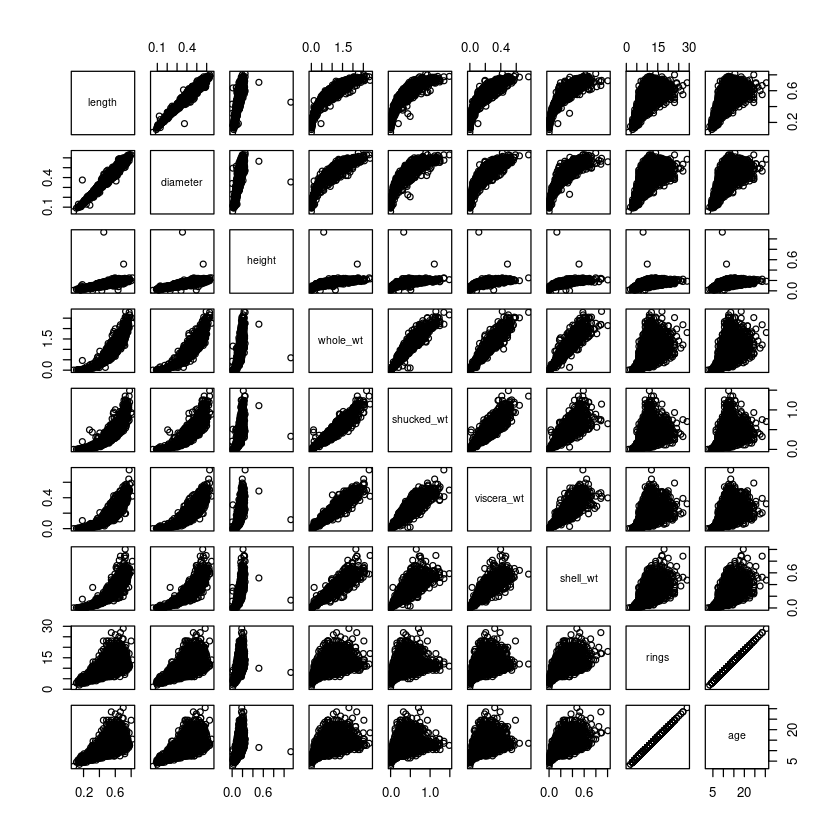

In [15]:
# check the relations and correlations between variables
pairs(abalone[,2:10])
cor(abalone[,2:10])

Relation to age:

    -Length: with a correlation of 0.557, there is some relation between length and age. However, the relation also displays heteroskedascity, as an increase in age coincides with an increase in the variance of measurements (hence the "cone" shape distribution).
    
    -Diameter: with a correlation of 0.575, there is some relation between diameter and age; it is almost identical in correlation and distribution to Length, with the same limitations. 
    
    -Height: having a correlation of 0.557, there is some relation between height and age. The distribution of height appears to have a distribution that displays relative homoskedascity, although in a distribution that seems to be better described with a coefficient or in an exponential sense.
    
    -Whole_wt: at 0.54 correlation, there is some relation between whole weight and age. The relation displays heteroskedascity as it "cones out", almost looking like a peak in middle ages. There may be some survival bias here, in that once an abalone hits a certain weight, it is harvested, regardless of age.
    
    -Shucked_wt: at a correlation value of 0.421, shucked_wt is worst value in relation to age. 
    
    -Viscera_wt: at 0.504 correlation, viscera_wt is the second worst value in relation to age. 
    
    -Shell_wt: Shell weight has the strongest correlation with age, at 0.628. The relationship does display heteroskedascity, but it is tighter than any of the other weight-related relationships.
    
    -Rings: rings are perfectly correlated with age, and have a perfect linear relationship... because rings are measured to define age. 
    
Now, what does a linear regression model have to say about the statistical significance of the variables? Or, statistically, what variables predict age the best?

In [16]:
### basic linear regression model information
abalonelm <- lm(age ~., abalone)
summary(abalonelm)


Call:
lm(formula = age ~ ., data = abalone)

Residuals:
       Min         1Q     Median         3Q        Max 
-2.176e-12 -6.900e-16  3.100e-16  1.530e-15  1.201e-13 

Coefficients:
              Estimate Std. Error    t value Pr(>|t|)    
(Intercept)  1.500e+00  4.603e-15  3.258e+14  < 2e-16 ***
sexI         1.776e-15  1.595e-15  1.113e+00  0.26562    
sexM        -5.374e-15  1.289e-15 -4.170e+00  3.1e-05 ***
length       6.190e-14  2.797e-14  2.213e+00  0.02695 *  
diameter    -6.035e-14  3.454e-14 -1.747e+00  0.08067 .  
height      -1.865e-14  2.389e-14 -7.810e-01  0.43500    
whole_wt     2.799e-14  1.142e-14  2.451e+00  0.01428 *  
shucked_wt  -4.335e-14  1.350e-14 -3.212e+00  0.00133 ** 
viscera_wt  -2.888e-14  2.016e-14 -1.432e+00  0.15217    
shell_wt     7.285e-15  1.751e-14  4.160e-01  0.67750    
rings        1.000e+00  2.395e-16  4.175e+15  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.392e-14 on 4166 degrees o

#### The Best Predictor (that can't be used)

**Rings** is the best predictor of age; in fact, it has a perfect correlation with **age**... because **age** is **rings**, just with 1.5 added to it. From a physical standpoint, **rings** cannot be used, because it is cumbersome and requires the use of a microscope, as mentioned in the *background* section above. 

#### Good Predictors

The physical predictors of **height**, **diameter**, **length**, and **whole weight** can be used together to make a fair prediction of age, as was done in part 2. Looking at the data, it appears that physical appearance is already used as a metric to harvest the abalones: the distribution of the data, in which physical characteristics seem to peak around middle age (the largest and heaviest abalones inhabit the middle of the data). This implies a survival bias, in which the smaller abalones live for longer before being harvested, while those which grow fast get harvested much sooner.

In terms of the linear regression model of all traits, **length**, **whole weight**, **shucked weight**, and **sex** (when it equals **M**) have p-values less that .05, meaning that they are pretty statistically significant. **Diameter** has a p-value of less than .1, making it a fairly strong predictor, but not as significant as the others. 

#### Difficult Predictors

**Shell weight**, **viscera weight**, and **shucked weight** are not particularly good predictors *if* the age of the abalone is trying to be determined prior to harvesting and preparing it (as all three require killing the abalone). If the abalone has already been harvested, **shell weight** has a moderate correlation to age, and could be used as a proxy to rings in order to save time, but the age prediction will not be incredibly accurate.

## Conclusion

The **whole weight** of an abalone, although arguably the easiest physical trait to measure, is not a particularly strong indicator of age. Rather, in noting physical characteristics, **length**, **height**, and **diameter** do a significantly better job at predicting age, when fed through a linear regression model at a 70/30 train/test split, based on existing data. 

A major concern, in terms of the integrity of the data, is the potential survival bias attributed to **whole weight**. The way in which **whole weight** begins to decline at a certain age, as well as the statistical insignificance of **whole weight** in determining age (as attributed to a high p-value), implies that weight may be used as a default metric for age, meaning that particularly plump young abalone are harvested too early, whereas smaller, more mature abalone survive for much longer. While this is not explicitly defined in the data, intuition suggests that an abalone should gain weight with age, just as other living creatures do.

#### Post-Project

Thank you to everyone taking the time to read this project!

Please feel free to let me know what you think, and if you have any suggestions or comments!